# expression

In [1]:
import subprocess
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = 'Arial'
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline

# 3 group

In [9]:
%%bash
cd ~/CHMsInOtherContexts/CellStateTransition/CHMOrganization/Universal_specific/Features/overlap_IAPEz
# group 1 (universal CHM)
windowBed -w 2000 -v -a ../../Universal.CHM.bed -b /mnt/Storage/home/yanghui/annotations/mm10/Repeats/LTR/ERVK/mm10_euch.IAPEz-int.merged.bed > universalCHM_specific.bed
# group 2a (universal CHM)
windowBed -w 2000 -u -a ../../Universal.CHM.bed -b /mnt/Storage/home/yanghui/annotations/mm10/Repeats/LTR/ERVK/mm10_euch.IAPEz-int.merged.bed > universalCHM_IAPEz_overlap.bed
# group 2b (IAPEz repeats)
windowBed -w 2000 -u -b ../../Universal.CHM.bed -a /mnt/Storage/home/yanghui/annotations/mm10/Repeats/LTR/ERVK/mm10_euch.IAPEz-int.merged.bed > IAPEz_universalCHM_overlap.bed
# group 3 (IAPEz repeats)
windowBed -w 2000 -v -b ../../Universal.CHM.bed -a /mnt/Storage/home/yanghui/annotations/mm10/Repeats/LTR/ERVK/mm10_euch.IAPEz-int.merged.bed > IAPEz_specific.bed


## uniCHM / IAP genes expression level

In [84]:
%%bash
### IAPEz, universal CHM transcripts

cd ~/CHMsInOtherContexts/CellStateTransition/CHMOrganization/Universal_specific/Features/overlap_IAPEz
mkdir -p transcripts_expression
for bed in universalCHM_specific.bed universalCHM_IAPEz_overlap.bed IAPEz_universalCHM_overlap.bed IAPEz_specific.bed;do
    for distance in 0 2000 5000;do
        mkdir -p transcripts_expression/within_${distance}
        out_name=${bed%%.bed}.transTSS_${distance}.bed
        windowBed -w $distance -u -a /mnt/Storage/home/yanghui/imprinting/result.2021/Exploring/CHMsInOtherContexts/CellStateTransition/Prepare/TEUnitAssemble/mm10_te_tx_TSS.bed -b $bed > transcripts_expression/within_${distance}/${out_name}
    done
done

In [89]:
IAPEz_trans_dict = {}
for distance in [0, 2000, 5000] :
    os.chdir(f'/mnt/Storage/home/wangyiman/CHMsInOtherContexts/CellStateTransition/CHMOrganization/Universal_specific/Features/overlap_IAPEz/transcripts_expression/within_{distance}')
    IAPEz_trans_dict[distance] = {}
    for x in ['universalCHM_specific', 'universalCHM_IAPEz_overlap', 'IAPEz_specific', 'IAPEz_universalCHM_overlap'] :
        IAPEz_trans_dict[distance][x] = pd.read_csv(f'{x}.transTSS_{distance}.bed', sep = "\t", header = None)[3].tolist()
        print(distance, x, len(IAPEz_trans_dict[distance][x]))

0 universalCHM_specific 215
0 universalCHM_IAPEz_overlap 598
0 IAPEz_specific 83
0 IAPEz_universalCHM_overlap 500
2000 universalCHM_specific 514
2000 universalCHM_IAPEz_overlap 1054
2000 IAPEz_specific 237
2000 IAPEz_universalCHM_overlap 1050
5000 universalCHM_specific 843
5000 universalCHM_IAPEz_overlap 1485
5000 IAPEz_specific 371
5000 IAPEz_universalCHM_overlap 1460


In [15]:
### read in expr matrix (log2(TPM+1))
expr_mat_log2p1 = pd.read_csv('/mnt/Storage/home/yanghui/imprinting/result.2021/Exploring/CHMsInOtherContexts/CellStateTransition/CHMOrganization/Universal_specific/Functions/Regulatory/TransposableElement/mm10_te_transcript.log2TPM_plus1.txt',
                              header = 0, sep = "\t"
                             )
expr_mat_log2p1

,TE_transcript,2cell.rep1,2cell.rep2,2cell.rep3,2cell.rep4,8cell.rep1,8cell.rep2,8cell.rep3,Morula.rep1,Morula.rep2,...,E13.5_liver.rep1,E13.5_liver.rep2,E14.5_liver.rep1,E14.5_liver.rep2,E15.5_liver.rep1,E15.5_liver.rep2,E16.5_liver.rep1,E16.5_liver.rep2,P0_liver.rep1,P0_liver.rep2
0,TU1,0.322292,1.836873,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,TU10,0.235138,0.008321,0.000000,1.075800,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,TU100,0.542693,0.000000,0.000000,0.175892,0.000000,0.000000,0.000000,1.016921,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,TU1000,1.947393,0.000000,0.000000,0.531876,0.000000,0.547198,0.010678,1.118545,0.003518,...,0.037091,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.097483,0.002648
4,TU10000,0.000000,0.000000,0.719179,0.448241,0.000000,0.000000,0.000000,0.054214,0.000000,...,0.048316,0.000000,0.000000,0.024500,0.060583,0.000000,0.024648,0.023156,0.043306,0.021776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89828,TU99989,0.103686,0.052083,0.067699,0.083514,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
89829,TU9999,0.103766,0.102393,0.783440,0.162578,0.674100,0.000000,0.201657,0.460566,0.000000,...,0.000000,0.079388,0.055176,0.078704,0.097880,0.126428,0.135823,0.212765,0.120735,0.087103
89830,TU99990,2.758523,2.662714,2.439128,2.471200,0.476954,0.122416,0.854594,0.359201,0.034997,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
89831,TU99991,0.000000,0.000000,0.000000,0.000000,0.157757,0.000000,0.000000,0.000000,0.000000,...,0.090912,0.092004,0.000000,0.031050,0.184209,0.058026,0.091784,0.193949,0.027655,0.000000


In [93]:
expr_melt_log2p1_IAP_dict = {}
for distance in [0, 2000, 5000] :
    expr_melt_log2p1_IAP = pd.DataFrame()
    for k in ['universalCHM_specific', 'universalCHM_IAPEz_overlap', 'IAPEz_specific', 'IAPEz_universalCHM_overlap'] :
        df = expr_mat_log2p1.loc[expr_mat_log2p1['TE_transcript'].isin(IAPEz_trans_dict[distance][k])]
        df = df.melt(id_vars = ['TE_transcript']).drop_duplicates()
        df['Type'] = k
        df['stage'] = df['variable'].str.split('\.r', expand = True)[0]
        df['stage_order'] = [i for i,j in enumerate(df['stage'])]
        df_mean = df[['TE_transcript', 'value', 'Type', 'stage', 'stage_order']].groupby(['stage', 'TE_transcript'], as_index=False).agg({'TE_transcript': 'first', 'value': 'mean', 'Type': 'first', 'stage_order': 'first'})
        expr_melt_log2p1_IAP = pd.concat([expr_melt_log2p1_IAP, df_mean.sort_values(['stage_order'])])

    expr_melt_log2p1_IAP_dict[distance] = expr_melt_log2p1_IAP
    
expr_melt_log2p1_IAP_dict[2000]

,stage,TE_transcript,value,Type,stage_order
0,2cell,TU101530,0.000000,universalCHM_specific,0
1,2cell,TU101980,0.000452,universalCHM_specific,1
2,2cell,TU103307,0.069979,universalCHM_specific,2
3,2cell,TU104275,0.010125,universalCHM_specific,3
4,2cell,TU104857,0.000000,universalCHM_specific,4
...,...,...,...,...,...
27295,P0_liver,TU99870,0.036584,IAPEz_universalCHM_overlap,74545
27296,P0_liver,TU99946,0.005304,IAPEz_universalCHM_overlap,74546
27297,P0_liver,TU99947,0.000000,IAPEz_universalCHM_overlap,74547
27298,P0_liver,TU99949,0.005526,IAPEz_universalCHM_overlap,74548


In [53]:
len(expr_melt_log2p1_IAP['stage'].unique())

33

In [91]:
(514 + 1054 + 237 + 1050) * 33

94215

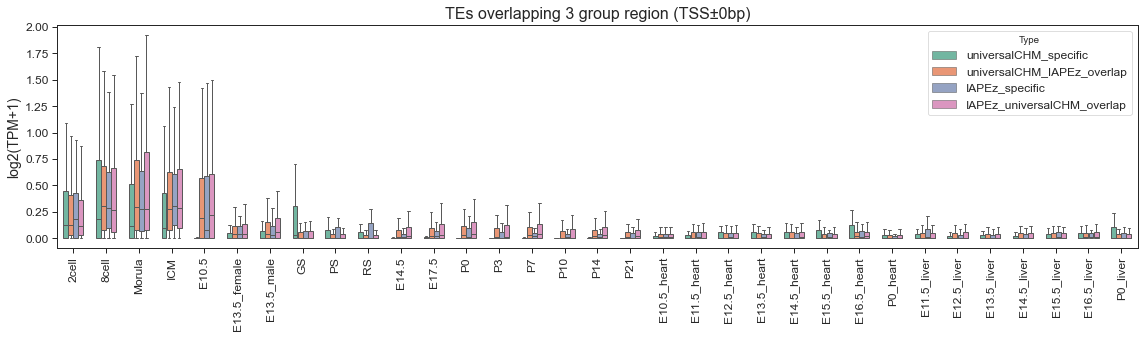

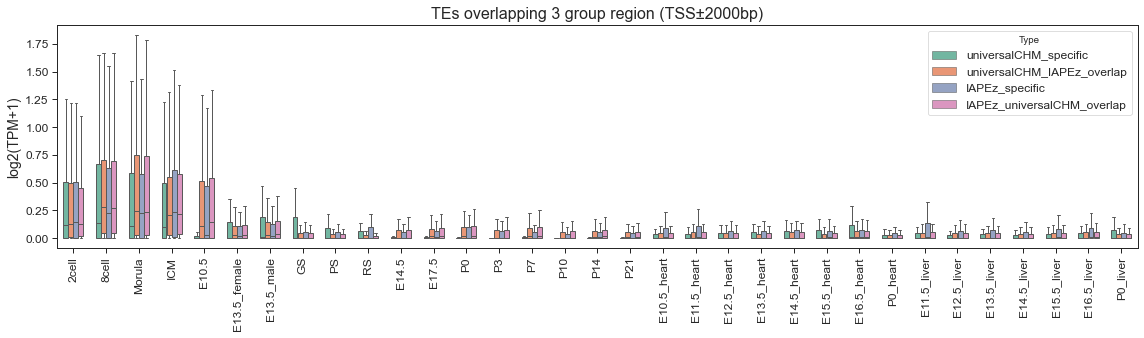

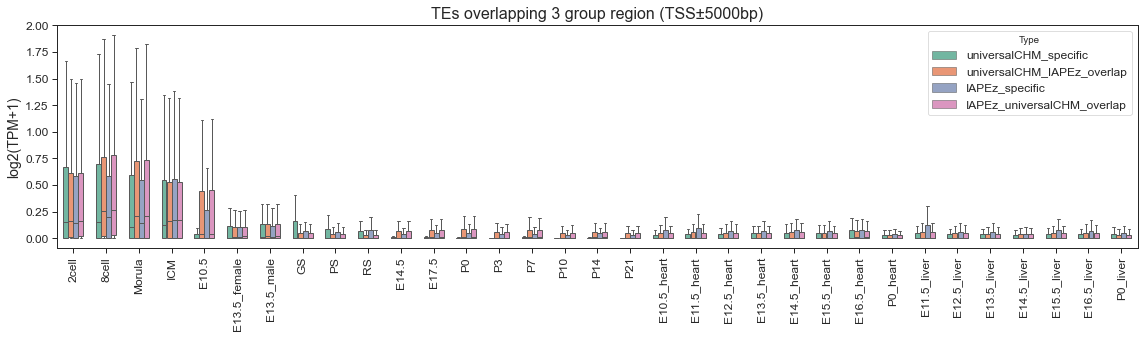

In [95]:
with sns.axes_style('white', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 16,
                             'axes.labelsize': 14,
                             'xtick.labelsize': 12,
                             'ytick.labelsize': 12,
                             'legend.fontsize': 12
                         }):
    for distance in [0, 2000, 5000] :
        fig, ax = plt.subplots(figsize=(6.4 * 2.5, 4.8), tight_layout = True)
        sns.boxplot(
            data = expr_melt_log2p1_IAP_dict[distance],
            y = 'value',
            x = 'stage',
            hue = 'Type',
            showfliers = False, 
            palette = 'Set2',
            width = .618,
            linewidth = 1
        )
        ax.set_title(f'TEs overlapping 3 group region (TSS±{distance}bp)')
        ax.set_xlabel('')
        ax.set_ylabel('log2(TPM+1)')
        ax.set_xticks(ax.get_xticks())
        ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, ha = 'center', va = 'top')

#         fig.savefig(f'/mnt/Storage/home/wangyiman/CHMsInOtherContexts/figures/make13_box_TETPM_{distance}_compareCHMnonCHMAB_5tissue.pdf', transparent = True)
        